In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten, Concatenate, Input, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd

#json 읽어오기
news_data = pd.read_json(r'C:\Users\injoo\광주 인공지능 사관학교\로테이션\자연어처리&추천시스템 김준태\News_Category_Dataset_v2.json', lines=True)
#print(news_data)
news_data = news_data.loc[:, ["category", "headline"]]

#카테고리 정수 인코딩
#news_data['category'] = news_data['category'].replace(~~, ~)
# print(pd.factorize(news_data['category']))
category_list = pd.factorize(news_data['category'])[1]
news_data['category'] = pd.factorize(news_data['category'])[0]

print(news_data)

        category                                           headline
0              0  There Were 2 Mass Shootings In Texas Last Week...
1              1  Will Smith Joins Diplo And Nicky Jam For The 2...
2              1    Hugh Grant Marries For The First Time At Age 57
3              1  Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4              1  Julianna Margulies Uses Donald Trump Poop Bags...
...          ...                                                ...
200848        14  RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849        10  Maria Sharapova Stunned By Victoria Azarenka I...
200850        10  Giants Over Patriots, Jets Over Colts Among  M...
200851        10  Aldon Smith Arrested: 49ers Linebacker Busted ...
200852        10  Dwight Howard Rips Teammates After Magic Loss ...

[200853 rows x 2 columns]


In [3]:
# 정규표현식 사용
news_data['headline'] =  news_data['headline'].str.replace("[^\w]", " ")

In [4]:
from sklearn.model_selection import train_test_split

# split하면서 shuffle 적용
news_train, news_test, y_train, y_test = train_test_split(news_data['headline'], news_data['category'], test_size=0.2, shuffle=True, random_state=23)

# 원핫벡터로 만들어줍시다! (num_classes로 카테고리 수 명시 가능)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(len(y_train[0]))
print(len(y_test[0]))

41
41


In [5]:
#토큰화 진행
stopwords = ['a', 'an']

X_train = []
for stc in news_train:
    token = []
    words = stc.split()
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_train.append(token)
    
X_test = []
for stc in news_test:
    token = []
    words = stc.split()
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_test.append(token)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 헤드라인 정수인코딩
tokenizer = Tokenizer(25000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [7]:
#여기서 빈도수가 2 이하인 단어들의 개수가 26900개, 전체 단어 개수가 50923개 이니 위에 25000개 대략 넣은 것
print(len(tokenizer.word_index))

wc = 0
for word, word_count in tokenizer.word_counts.items():
    if word_count <=2:
        wc +=1
print(wc)

50923
26916


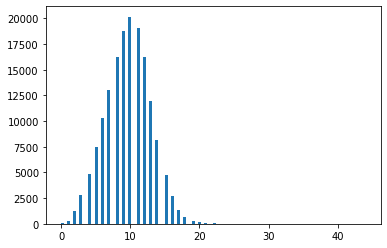

In [8]:
import matplotlib.pyplot as plt

len_stc = []
for data in X_train:
    len_stc.append(len(data))

y, x , _= plt.hist(len_stc, bins = 100)
plt.show()

In [9]:
max_len = 15
#max_len을 위 히스토그램에서 15로 잡고, padding 해주는 것
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [10]:
model = Sequential()
model.add(Embedding(25000, 128))
model.add(LSTM(128))
model.add(Dense(41, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=1)

2106/2511 [========================>.....] - ETA: 14s - loss: 2.0624 - acc: 0.4607

In [ ]:
sentence = input()
token_stc = sentence.split()
encode_stc = tokenizer.texts_to_sequences([token_stc])
pad_stc = pad_sequences(encode_stc, maxlen=15)

score = model.predict(pad_stc)
print(category_list[score.argmax()], score[0, score.argmax()])

## 트위터 감정 분석

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

tweet_data = pd.read_csv(r'C:\Users\injoo\광주 인공지능 사관학교\로테이션\자연어처리&추천시스템 김준태\tweet_dataset.csv')
tweet_data = tweet_data.loc[:, ["sentiment", "text"]]
tweet_data = tweet_data.dropna(how='any')

#감정 인코딩
print(pd.factorize(tweet_data['sentiment']))
tweet_data['sentiment'] = pd.factorize(tweet_data['sentiment'])[0]
print(tweet_data)

In [ ]:
#정규표현식 써서 단어 아니면 삭제
tweet_data['text'] = tweet_data['text'].str.replace("[^\w]", " ")

In [ ]:
# test/train 스플릿
tweet_train, tweet_test, y_train, y_test = train_test_split(tweet_data['text'], tweet_data['sentiment'], test_size=0.2, shuffle = True, random_state=23)

#원핫벡터화
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(len(y_train[0]))
print(len(y_test))

In [ ]:
from nltk.tokenize import WordPunctTokenizer

#nltk stopwords 리스트
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

#토큰화 진행
X_train = []
for stc in tweet_train:
    token = []
    words = WordPunctTokenizer().tokenize(stc)
    for word in words:
        if word.lower() not in stopwords:
            token.append(word.lower())
    X_train.append(token)

X_test=  []
for stc in tweet_test:
    token = []
    words = WordPunctTokenizer().tokenize(stc)
    for word in words:
        if word.lower() not in stopwords:
            token.append(word.lower())
    X_test.append(token)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

#트윗 정수인코딩
tokenizer = Tokenizer(10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train)

In [ ]:
print(len(tokenizer.word_index))
low_count = 0
for word, word_count in tokenizer.word_counts.items():
    if word_count > 1:
        low_count +=1
print(low_count)

In [ ]:
# 문장의 최대 길이 구하기
import matplotlib.pyplot as plt

len_stc = []
for data in X_train:
    len_stc.append(len(data))

y, x, _ = plt.hist(len_stc)
plt.show()
print(sum(len_stc)/len(len_stc))
print(y.max())
print(x.max())
print(x[np.where(y== y.max())])

In [ ]:
max_len = 25
X_train = pad_sequences(X_train, maxlen= max_len)
X_test  = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print(y_train[1])

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(13, activation='softmax'))

In [ ]:
#함수형 케라스
inputs = Input(shape=(25, ))
embed = Embedding(10000, 32)(inputs)
drop = Dropout(0.3)(embed)

#모델 합성
concat_layers = []

conv = Conv1D(32, 1, padding="same", activation='relu')(drop)
pool = GlobalMaxPooling1D()(conv)
flat = Flatten()(pool)
concat_layers.append(flat)

conv = Conv1D(32, 2, padding="same", activation='relu')(drop)
pool = GlobalMaxpooling1D()(conv)
flat = Flatten()(pool)
concat_layers.append(flat)
#####
concat = Concatenate()(concat_layers)
relu = Dense(64, activation='relu')(concat)
drop = Dropout(0, 5)(relu)

outputs = Dense(13, activation = "softmax")(drop)

model = Model(inputs, outputs)

In [ ]:
model.compile(loss='catego')